In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from imutils import paths
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/Facemask_Detection_Dataset.zip

Archive:  drive/MyDrive/Facemask_Detection_Dataset.zip
   creating: Facemask_Detection_Dataset/
   creating: Facemask_Detection_Dataset/without_mask/
  inflating: Facemask_Detection_Dataset/without_mask/without_mask_100.jpg  
  inflating: Facemask_Detection_Dataset/without_mask/without_mask_1000.jpg  
  inflating: Facemask_Detection_Dataset/without_mask/without_mask_1001.jpg  
  inflating: Facemask_Detection_Dataset/without_mask/without_mask_1002.jpg  
  inflating: Facemask_Detection_Dataset/without_mask/without_mask_1004.jpg  
  inflating: Facemask_Detection_Dataset/without_mask/without_mask_1005.jpg  
  inflating: Facemask_Detection_Dataset/without_mask/without_mask_1009.jpg  
  inflating: Facemask_Detection_Dataset/without_mask/without_mask_101.jpg  
  inflating: Facemask_Detection_Dataset/without_mask/without_mask_1011.jpg  
  inflating: Facemask_Detection_Dataset/without_mask/without_mask_1013.jpg  
  inflating: Facemask_Detection_Dataset/without_mask/without_mask_1014.jpg  
  inf

# **Data Loading**

In [ ]:
dataset = "/content/Facemask_Detection_Dataset"


In [ ]:
imagePaths=list(paths.list_images(dataset))

In [ ]:
imagePaths

['/content/Facemask_Detection_Dataset/with_mask/with_mask_1239.jpg',
 '/content/Facemask_Detection_Dataset/with_mask/with_mask_3454.jpg',
 '/content/Facemask_Detection_Dataset/with_mask/with_mask_71.jpg',
 '/content/Facemask_Detection_Dataset/with_mask/with_mask_284.jpg',
 '/content/Facemask_Detection_Dataset/with_mask/with_mask_1102.jpg',
 '/content/Facemask_Detection_Dataset/with_mask/with_mask_2715.jpg',
 '/content/Facemask_Detection_Dataset/with_mask/with_mask_662.jpg',
 '/content/Facemask_Detection_Dataset/with_mask/with_mask_1228.jpg',
 '/content/Facemask_Detection_Dataset/with_mask/with_mask_3363.jpg',
 '/content/Facemask_Detection_Dataset/with_mask/with_mask_3381.jpg',
 '/content/Facemask_Detection_Dataset/with_mask/with_mask_445.jpg',
 '/content/Facemask_Detection_Dataset/with_mask/with_mask_1084.jpg',
 '/content/Facemask_Detection_Dataset/with_mask/with_mask_1427.jpg',
 '/content/Facemask_Detection_Dataset/with_mask/with_mask_1631.jpg',
 '/content/Facemask_Detection_Dataset/w

# **Data Preprocessing**

In [ ]:
data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image = load_img(i,target_size=(96,96))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
data = np.array(data,dtype='float32')
labels = np.array(labels)

In [ ]:
labels

array(['with_mask', 'with_mask', 'with_mask', ..., 'without_mask',
       'without_mask', 'without_mask'], dtype='<U12')

In [ ]:
lb=LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
## Splitting of Data

train_X,test_X,train_Y,test_Y = train_test_split(data,labels,test_size=0.20,random_state=10,stratify=labels)

In [ ]:
train_X

array([[[[-0.827451  , -0.88235295, -0.92941177],
         [-0.8117647 , -0.8509804 , -0.8980392 ],
         [-0.77254903, -0.79607844, -0.8509804 ],
         ...,
         [-0.5764706 , -0.70980394, -0.7882353 ],
         [-0.5372549 , -0.64705884, -0.7176471 ],
         [-0.6313726 , -0.70980394, -0.78039217]],

        [[-0.8352941 , -0.8901961 , -0.9529412 ],
         [-0.827451  , -0.85882354, -0.92941177],
         [-0.79607844, -0.81960785, -0.8901961 ],
         ...,
         [-0.58431375, -0.69411767, -0.79607844],
         [-0.58431375, -0.6862745 , -0.75686276],
         [-0.62352943, -0.7019608 , -0.77254903]],

        [[-0.827451  , -0.88235295, -0.94509804],
         [-0.81960785, -0.8509804 , -0.92156863],
         [-0.7882353 , -0.8117647 , -0.88235295],
         ...,
         [-0.60784316, -0.7176471 , -0.81960785],
         [-0.5921569 , -0.69411767, -0.7647059 ],
         [-0.58431375, -0.6627451 , -0.7411765 ]],

        ...,

        [[-0.7647059 , -0.92941177, -0

In [ ]:
train_X.shape

(3200, 96, 96, 3)

In [ ]:
test_X.shape

(800, 96, 96, 3)

In [ ]:
aug=ImageDataGenerator(
                       rotation_range=20,
                       zoom_range=0.15,width_shift_range=0.2,
                       height_shift_range=0.2,shear_range=0.15,
                       horizontal_flip=True,
                       vertical_flip=True,
                       fill_mode='nearest'
                       )

# **CNN Model Training**

In [ ]:
input_shape = (96,96,3)

In [ ]:
# Build Model
input_image = Input(shape=input_shape)
# 1st Conv layer
model = Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape)(input_image)
model = MaxPooling2D((2, 2),padding='same')(model)
# 2nd Conv layer
model = Conv2D(32, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# 3rd Conv layer
model = Conv2D(64, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# 4th Conv layer
model = Conv2D(128, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# 5th Conv layer
model = Conv2D(256, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# FC layers
model = Flatten()(model)

model = Dense(1024)(model)

model = Dense(64)(model)


output= Dense(2, activation='softmax')(model)

model = Model(inputs=[input_image], outputs=[output])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496 

In [ ]:
lr=0.0005
Epochs=100
BS=32

opt=tf.keras.optimizers.legacy.Adam(learning_rate=lr,decay=lr/Epochs)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
history=model.fit(
aug.flow(train_X,train_Y,batch_size=BS),
steps_per_epoch=len(train_X)//BS,
validation_data=(test_X,test_Y),
validation_steps=len(test_X)//BS,
epochs=Epochs
    
)


Epoch 1/100
100/100 [==============================] - 17s 89ms/step - loss: 0.5224 - accuracy: 0.7487 - val_loss: 0.3526 - val_accuracy: 0.8625
Epoch 2/100
100/100 [==============================] - 9s 89ms/step - loss: 0.3602 - accuracy: 0.8447 - val_loss: 0.2522 - val_accuracy: 0.9025
Epoch 3/100
100/100 [==============================] - 7s 71ms/step - loss: 0.2819 - accuracy: 0.8831 - val_loss: 0.2415 - val_accuracy: 0.9100
Epoch 4/100
100/100 [==============================] - 9s 87ms/step - loss: 0.2490 - accuracy: 0.8972 - val_loss: 0.3700 - val_accuracy: 0.8925
Epoch 5/100
100/100 [==============================] - 8s 83ms/step - loss: 0.2387 - accuracy: 0.9094 - val_loss: 0.2517 - val_accuracy: 0.9013
Epoch 6/100
100/100 [==============================] - 11s 109ms/step - loss: 0.2310 - accuracy: 0.9103 - val_loss: 0.1955 - val_accuracy: 0.9337
Epoch 7/100
100/100 [==============================] - 9s 94ms/step - loss: 0.1921 - accuracy: 0.9231 - val_loss: 0.1735 - val_accura

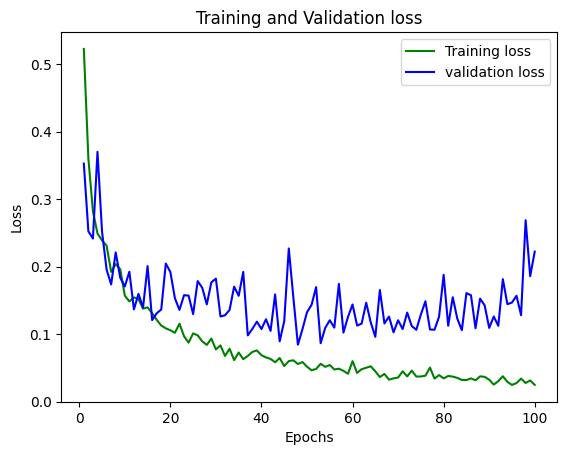

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

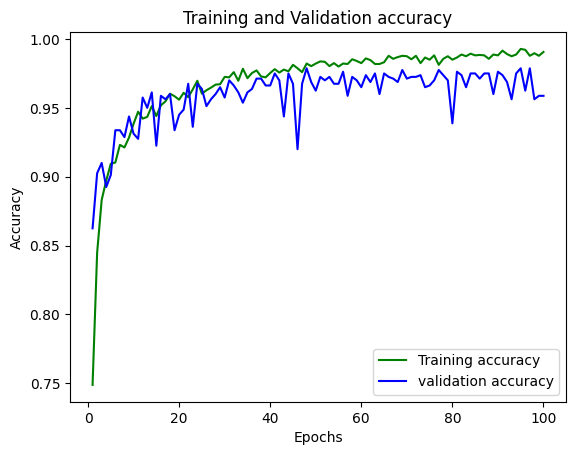

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

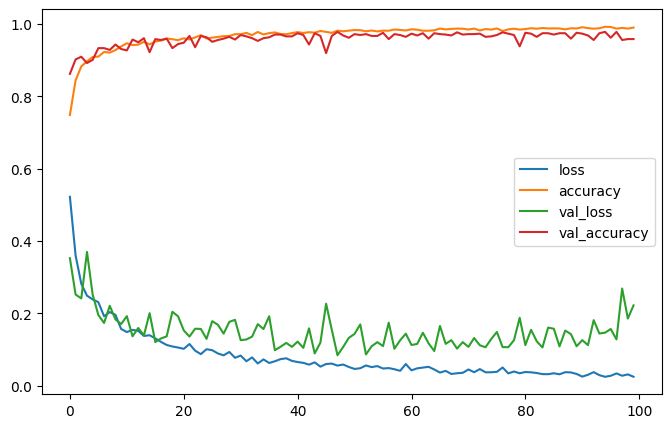

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Facemask_CNN.h5')

## **Classification Report**

In [ ]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

25/25 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

   with_mask       0.93      0.99      0.96       400
without_mask       0.99      0.93      0.96       400

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



## **Prediction**

In [ ]:
def detect_face_mask(img):
  y_pred = model.predict(img.reshape(1,96,96,3))
  prob_class_0 = y_pred[0][0]  # Predicted probability for Class 0
  prob_class_1 = y_pred[0][1]
  if prob_class_0>prob_class_1:
    return "With Mask"
  else:
    return "Without Mask"


In [ ]:
detect_face_mask(test_X[90])

1/1 [==============================] - 0s 86ms/step


'With Mask'

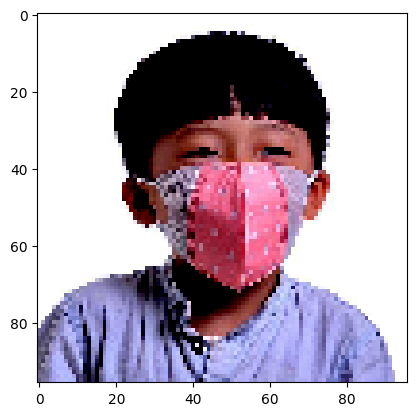

In [ ]:
plt.imshow(test_X[90])

# **Applying Face Mask Dtector**

In [ ]:
# from os.path import dirname, join,__file__
prototxtPath = '/content/drive/MyDrive/deploy.prototxt.txt'
weightsPath= '/content/drive/MyDrive/res10_300x300_ssd_iter_140000.caffemodel'

In [ ]:
prototxtPath

'content/drive/MyDrive/deploy.prototxt.txt'

In [ ]:
net=cv2.dnn.readNet(weightsPath,prototxtPath)

In [ ]:

net

< cv2.dnn.Net 0x7f5ddc075230>

In [ ]:
## Load model
model=load_model(r'/content/drive/MyDrive/Facemask_CNN.h5')

In [ ]:
image=cv2.imread("/content/drive/MyDrive/child-wth-mask.jpg")


In [ ]:
image.shape

(400, 600, 3)

In [ ]:
(h,w)=image.shape[:2]

In [ ]:
blob=cv2.dnn.blobFromImage(image,1.0,(300,300),(104.0,177.0,123.0))
blob.shape
net.setInput(blob)
detections = net.forward()

In [ ]:
detections

array([[[[0.        , 1.        , 0.91987616, ..., 0.14125681,
          0.43412578, 0.60726136],
         [0.        , 1.        , 0.12731847, ..., 4.000538  ,
          4.8379507 , 4.984187  ],
         [0.        , 1.        , 0.11876492, ..., 0.02474943,
          4.832793  , 0.99399304],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [ ]:

#loop over the detections
det =[]
a=0
for i in range(0,detections.shape[2]):
    confidence=detections[0,0,i,2]
    print("CONF: ",confidence)
    if confidence>0.3:
        box=detections[0,0,i,3:7]*np.array([w,h,w,h])
        (startX,startY,endX,endY)=box.astype('int')
        (startX,startY)=(max(0,startX),max(0,startY))
        (endX,endY)=(min(w-1,endX), min(h-1,endY))
        face=image[startY:endY, startX:endX]
        face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
        plt.imshow(face)
        face=cv2.resize(face,(96,96))
        det.append(face)
        face=img_to_array(face)
        face=preprocess_input(face)
        face=np.expand_dims(face,axis=0)
        
        (mask,withoutMask)=model.predict(face)[0]
        print("MASK: ",mask)
        print("Without: ",withoutMask)
        #determine the class label and color we will use to draw the bounding box and text
        label='Mask' if mask>withoutMask else 'No Mask'
        color=(0,255,0) if label=='Mask' else (255,0,0)
        #include the probability in the label
        label="{}: {:.2f}%".format(label,max(mask,withoutMask)*100)
        
        #display the label and bounding boxes
        cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,color,2)
        cv2.rectangle(image,(startX,startY),(endX,endY),color,2)   
        a=a+1
# plt.imshow(det[1])

## **Result**

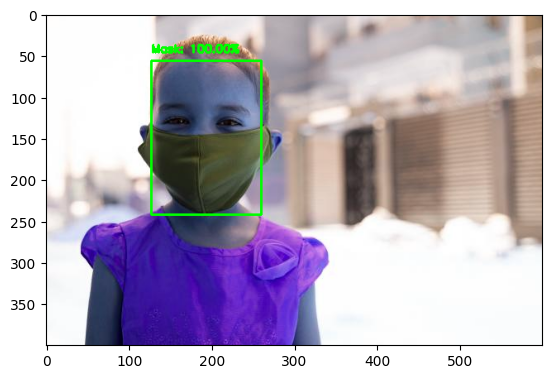

In [ ]:
plt.imshow(image)